In [1]:
%matplotlib inline  
import numpy as np      ### 수학 모듈 (numpy)를 불러와 np로 호출
import matplotlib.pyplot as plt   ### 그래프 그리는 모듈 matplot.pyplot을 불러와 plt로 호출
from scipy.sparse import csr_matrix, eye, diags, spdiags  ### sparse matrix  메모리 줄임
from scipy.sparse.linalg import eigs, spsolve

## List

In [67]:
a = [1,2,3,4,5]
a += 5

TypeError: 'int' object is not iterable

In [68]:
a + a

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5]

In [69]:
a * 3

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5]

In [70]:
type(a)

list

## numpy array

np.zeros, np.ones, np.arange, np.array 등 np로 만들어진 형태는 모두가 np array임

In [71]:
b = np.array(a)
type(b)

numpy.ndarray

In [72]:
b += 5
b

array([ 6,  7,  8,  9, 10])

In [73]:
b*2

array([12, 14, 16, 18, 20])

## indexing과 slicing

In [74]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [75]:
print (a[0], a[1], a[4], a[-2], a[-1])

0 1 4 8 9


In [76]:
print (a[2:5])
print (a[:4])
print (a[-3:])

[2 3 4]
[0 1 2 3]
[7 8 9]


### 2차원 배열

In [77]:
b = np.arange(100)
b = b.reshape(10,10)
b

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

In [78]:
b[-3,-1]

79

In [80]:
b[2:7, 3:5]

array([[23, 24],
       [33, 34],
       [43, 44],
       [53, 54],
       [63, 64]])

### 3차원 배열

In [84]:
c = np.random.uniform(0, 100, (7,512,512))
c.shape

(7, 512, 512)

In [86]:
c[0,:5,:5]

array([[49.86092227, 51.87223381, 67.60240377, 14.62336464, 37.79305803],
       [23.11338647, 82.80700107, 26.09720729, 95.12051797, 55.31619556],
       [32.25929005, 77.32253126, 85.86658076, 33.27010927, 63.50828143],
       [25.15805621, 99.76001548, 65.02434974, 76.89882809, 12.08578475],
       [82.7335202 , 99.44255935,  7.88717732, 76.16799304,  7.15299963]])

### enumerate

In [61]:
a = ['야만용사', '부두술사', '악마사냥꾼', '마법사']
for i in a:
    print (i)

야만용사
부두술사
악마사냥꾼
마법사


In [62]:
for idx, value in enumerate(a):
    print (idx, value)

0 야만용사
1 부두술사
2 악마사냥꾼
3 마법사


### Parameter 정의

In [2]:
boundary = 'Dirichlet'  # or 'Neumann'
hbar = 6.626e-34/2/np.pi
e = 1.6e-19
eo = 8.85e-12
er = 9
emass = 9.1e-31
me = 0.13   # CdSe me=0.13 mh=0.45       # CdS me:0.21 mh:0.8
mh = 0.45   # CdTe me=0.1  mh=0.4
Ep=20                     # CdS: me.18 mh0.6 Eg2.45       VBO=0.52    qX=4.79 er=8.6

## Define Geometry

In [3]:
materials = ['ZnS', 'CdSe']
radius = [4e-9, 2e-9]
dr = 2e-10
dz = 2e-10

ro = radius[0] + 2e-9
r = np.arange(0, ro+dr, dr) 
zo = radius[0]*2 + 4e-9
z = np.arange(0, zo + dz, dz) 

m = r.size
n = z.size        

**2차원 geometry 만들기**

In [87]:
cb = np.ones(shape=(m,n)) * 0
vb = np.ones(shape=(m,n)) * 10
er = np.ones(shape=(m,n)) * 2.5
me = np.ones(shape=(m,n)) / 0.13
mh = np.ones(shape=(m,n)) / 0.45
geo = np.zeros(shape=(m,n))
idx = 0
for rad in radius:
    print (rad)
    idx += 1
    for ridx, ra in enumerate(r):
        for zidx, zz  in enumerate(z):
            if ra**2 + (zz-(zo/2))**2  <= rad**2 :
                geo[ridx, zidx] = idx  # outmost

4e-09
2e-09


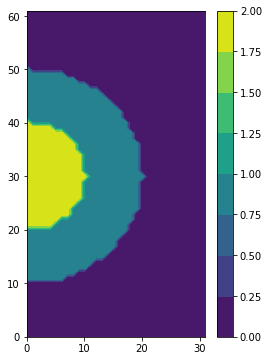

In [91]:
plt.figure(figsize = (4,6))
plt.contourf(geo.T)
plt.colorbar()

# Class 익히기

https://wikidocs.net/28

In [8]:
class Material:
    def __init__(self, name):
        self.name = name
        if name == 'CdSe':
            self.me = 0.13  #0.13
            self.mh = 0.7 #0.7
            self.er = 9.3 #9.3
            self.Eg = 1.74 # 1.74
            self.Ep = 23
            self.k = np.sqrt(self.Ep/2)
            self.cb = 4.95 #4.95
            self.vb = self.Eg + self.cb
        
        elif name == 'ZnS':
            self.me = 0.13 # 0.13
            self.mh = 0.45  # 0.45
            self.er = 8.6
            self.Eg = 3.7  # 3.9  # 3.68
            self.Ep = 23
            self.k = np.sqrt(self.Ep/2)
            self.cb = 3.95 # 3.95
            self.vb = self.Eg + self.cb

In [9]:
A = Material('CdSe')
B = Material('ZnS')
C = Material('CdSe')
print (A.Eg)
print (B.me)
print (A.Eg + B.Eg)
print (C.Eg)

1.74
0.13
5.44
1.74


A, B, C는 객체

객체를 정의할때는

#### 객체이름 = class이름(initial value)

In [93]:
temp1 = 0
temp2 = 10
mater = []
for key in materials:
    print (key)
    temp = Material(key) # 객체를 정의
    mater.append(temp)   # list의 원소로 Material 객체를 받음
    if temp.cb > temp1:
        temp1 = temp.cb + 0
    if temp.vb < temp2:
        temp2 = temp.vb + 0
Eg = temp2-temp1
print ('Bulk Eg = {}'.format(round(Eg, 2)))

ZnS
CdSe
Bulk Eg = 1.74


In [94]:
mater[0].Eg

3.7

In [95]:
for idx in range(len(radius)):
    temp = idx + 1
    for i in range(m):
        for j in range(n):
            if geo[i,j] == temp:   # Boundary  CdS
                er[i,j] = mater[idx].er
                cb[i,j] = 0 - mater[idx].cb
                vb[i,j] = mater[idx].vb
                me[i,j] = 1 / mater[idx].me
                mh[i,j] = 1 / mater[idx].mh

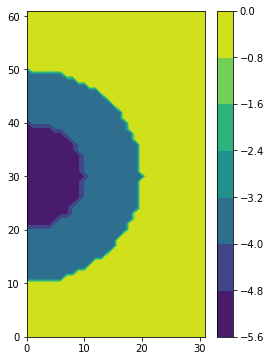

In [96]:
plt.figure(figsize = (4,6))
plt.contourf(cb.T)
plt.colorbar()

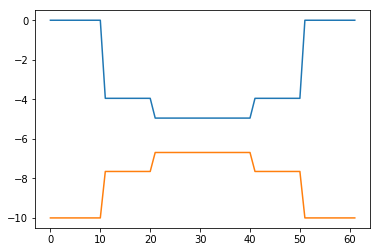

In [97]:
plt.plot(cb[0,:])
plt.plot(-vb[0,:])

reshape : 2차원 (m, n) array를 1차원 m*n array로 바꿈

In [15]:
cb_array = cb.reshape(m*n, 1) 
vb_array = vb.reshape(m*n, 1) 
er_array = er.reshape(m*n,1)
me_array = me.reshape(m*n,1)
mh_array = mh.reshape(m*n,1)

## 3D Hamiltonian from 

https://www.sciencedirect.com/science/article/pii/S0010465503004934

<img src = 'https://ars.els-cdn.com/content/image/1-s2.0-S0010465503004934-gr003.gif'>

## Solve Schrodinger Equation in 3D

## $$ \biggl(-\frac{\nabla^2}{2m} + V\biggr)\psi = E\psi $$

## $$ \frac{-h^2}{2}\nabla \cdot \biggl(\frac{1}{m(r)}\nabla\psi(r) \biggr) + V(r) \psi(r) = E\psi(r)$$

## $$ \psi = F(\rho, z)e^{iL\phi} $$

## $$ \frac{-h^2}{2}\left[\frac{1}{\rho}\frac{1}{m}\frac{\delta F}{\delta\rho} 
+ \frac{\delta}{\delta \rho}\biggl(\frac{1}{m}\frac{\delta F}{\delta\rho}\biggr) 
+ \frac{-L^2}{m \rho^2}F 
+ \frac{\delta}{\delta z}\biggl(\frac{1}{m}\frac{\delta F}{\delta z}\biggr) 
 \right] + VF = EF $$   

 ## 방법1 
 
 ### $$ \frac{-h^2}{2}\left[\frac{1}{m\rho}\frac{F(\rho+a, z) - F(\rho-a, z)}{2a} + \biggl(-\frac{1}{m(\rho-a, z)}\frac{F(\rho, z) - F(\rho-a, z)}{a^2} + \frac{1}{m(\rho+a, z)}\frac{F(\rho+a, z) - F(\rho, z)}{a^2}\biggr) 
+ \frac{-L^2}{\rho^2}F(\rho,z) 
+ \biggl(-\frac{1}{m(\rho, z-b)}\frac{F(\rho, z) - F(\rho, z-b)}{b^2} + \frac{1}{m(\rho, z+b)}\frac{F(\rho, z+b) - F(\rho, z)}{b^2}\biggr) 
\right] + VF = EF $$

즉, 이것을 구현하면 된다.

$$ F(\rho,z)\biggl(-\frac{1}{m(\rho-a, z)a^2}-\frac{1}{m(\rho+a, z)a^2}-\frac{1}{m(\rho, z-b)b^2}-\frac{1}{m(\rho, z+b)b^2} \biggr) $$
 
 $$ F(\rho+a,z)\biggl(\frac{1}{2m\rho a} + \frac{1}{m(\rho+a,z)a^2} \biggr)$$
 
 $$ F(\rho-a,z)\biggl(\frac{1}{2m\rho a} + \frac{1}{m(\rho-a,z)a^2} \biggr)$$
 
 $$ F(\rho, z+b)\biggl(\frac{1}{m(\rho, z+b)b^2} \biggr) $$
 
  $$ F(\rho, z-b)\biggl(\frac{1}{m(\rho, z-b)b^2} \biggr) $$

## 방법2

## $$ \frac{-h^2}{2}\left[\frac{1}{\rho}\frac{1}{m}\frac{\delta F}{\delta\rho} 
+ \frac{\delta}{\delta \rho}\biggl(\frac{1}{m}\frac{\delta F}{\delta\rho}\biggr) 
+ \frac{-L^2}{m \rho^2}F 
+ \frac{\delta}{\delta z}\biggl(\frac{1}{m}\frac{\delta F}{\delta z}\biggr) 
 \right] + VF = EF $$   

### $$ \biggl(\frac{\delta^2 F}{\delta \rho^2} + \frac{\delta^2 F}{\delta z^2} \biggr)\frac{1}{m}$$

### $$ \frac{\delta\frac{1}{m}}{\delta \rho}\cdot \frac{\delta F}{\delta \rho} +\frac{\delta\frac{1}{m}}{\delta z}\cdot \frac{\delta F}{\delta z}$$

### $$ \frac{1}{\rho m}\frac{\delta F}{\delta \rho} $$

### 1. Laplacian 
#### $$ \biggl(\frac{\delta^2 F}{\delta \rho^2} + \frac{\delta^2 F}{\delta z^2} \biggr)\frac{1}{m}$$


r 방향 mesh : dr

z 방향 mesh : dz

In [16]:
mat = np.zeros((m*n, m*n))
matZ = eye(n)*(-2) +eye(n,k=1) +eye(n, k=-1)
matZ /= (dz**2)
matZ = matZ.todense()

for i in range(m):
    mat[n*i:n*(1+i), n*i:n*(1+i)] = matZ
mat

array([[-5.0e+19,  2.5e+19,  0.0e+00, ...,  0.0e+00,  0.0e+00,  0.0e+00],
       [ 2.5e+19, -5.0e+19,  2.5e+19, ...,  0.0e+00,  0.0e+00,  0.0e+00],
       [ 0.0e+00,  2.5e+19, -5.0e+19, ...,  0.0e+00,  0.0e+00,  0.0e+00],
       ...,
       [ 0.0e+00,  0.0e+00,  0.0e+00, ..., -5.0e+19,  2.5e+19,  0.0e+00],
       [ 0.0e+00,  0.0e+00,  0.0e+00, ...,  2.5e+19, -5.0e+19,  2.5e+19],
       [ 0.0e+00,  0.0e+00,  0.0e+00, ...,  0.0e+00,  2.5e+19, -5.0e+19]])

In [17]:
matR = eye(m*n)*(-2) +eye(m*n,k=n) +eye(m*n, k=-n)
matR.todense()

matrix([[-2.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0., -2.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0., -2., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ..., -2.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0., -2.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0., -2.]])

In [18]:
matR[0:n, n:2*n].todense()

matrix([[1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 1.]])

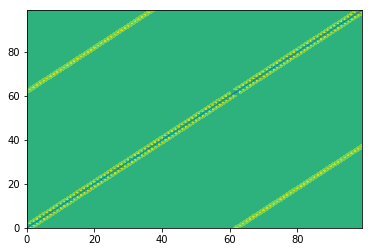

In [19]:
matR /= (dr**2)
mat = mat + matR
plt.contourf(mat[:100,:100])

In [20]:
term1 = np.zeros((m*n,m*n))

for i in range(m*n):
    term1[i, :] = mat[i,:] * me_array[i,0]

## 2. 

### $$ \frac{\delta\frac{1}{m}}{\delta \rho}\cdot \frac{\delta F}{\delta \rho} $$

### $$ \frac{\delta F}{\delta \rho}\cdot \frac{\delta}{\delta \rho} (coefficient \space array) $$

In [21]:
dFdrho = eye(m*n, k=n)+eye(m*n, k=-n)*-1
dFdrho /= (2*dr)
dFdrho = dFdrho.todense()

In [22]:
dFdrho.shape

(1984, 1984)

In [23]:
dcdrho = eye(m*n,k=n)+eye(m*n,k=-n)*-1 # for calculating coefficient matrix w different boundary condition
dcdrho /= (2*dr)
dcdrho *= me_array

In [24]:
dcdrho.shape

(1984, 1)

In [25]:
term2 = np.zeros((m*n,m*n))

for i in range(m*n):
    term2[i, :] = dFdrho[i,:] * dcdrho[i,0]

## 3.

### $$ \frac{\delta\frac{1}{m}}{\delta z}\cdot \frac{\delta F}{\delta z} $$

### $$ \frac{\delta F}{\delta z}\cdot \frac{\delta}{\delta z} (coefficient \space array) $$

In [26]:
dFdz = eye(n,k=1) + eye(n,k=-1)*-1 
dFdz /= (2*dz)
dFdz = dFdz.todense()

dFdz : n x n matrix

In [27]:
dcdz = (eye(n,k=1) + eye(n,k=-1)*-1 ) / (2*dz)
dcdz = dcdz.todense()

In [29]:
dcdzM =  np.zeros((m*n, m*n))
dFdzM = np.zeros((m*n, m*n))
    
for i in range(m):
    dcdzM[i*n:n*(i+1), i*n:n*(i+1)] = dcdz
    dFdzM[i*n:n*(i+1), i*n:n*(i+1)] = dFdz

both are m*n x m*n matrix

In [30]:
dcdzM *= me_array

In [31]:
term3 = np.zeros((m*n,m*n))

for i in range(m*n):
    term3[i, :] = dFdzM[i,:] * dcdzM[i,0]

## 4.

### $$ \frac{1}{\rho m}\frac{\delta F}{\delta \rho} $$

In [32]:
coeff_over_r = np.zeros((m*n,1))
for j in range(1, m-1):
    coeff_over_r[j*n: n*(j+1)] = me_array[j*n:n*(j+1)]/r[j]

In [33]:
term4 = np.zeros((m*n,m*n))

for i in range(m*n):
    term4[i, :] = dFdrho[i,:] * coeff_over_r[i,0]

### $$\frac{dF(\rho,z)}{d\rho} =0 \space \space at \rho=0 $$

### $$ F(\rho_1,z) = F(\rho_2,z)  $$

In [34]:
inhomo_lap = term1+term2+term3+term4
inhomo_lap[n:2*n,n:2*n] += inhomo_lap[n:2*n,0:n]*(1)
inhomo_lap[n:2*n,2*n:3*n] += inhomo_lap[n:2*n,0:n]*(0)
inhomo_lap = inhomo_lap[n:m*n,n:m*n]
inhomo_lap = csr_matrix(inhomo_lap)

In [35]:
inhomo_lap = inhomo_lap /e  * hbar ** 2 / 2 * (-1) / emass

In [36]:
V  = diags(cb_array[n:,0], 0)

In [37]:
Hamiltonian = inhomo_lap + V
eev, eef= eigs(Hamiltonian, 5, sigma = -5, which='LM')
eev

array([-4.51690035+0.j, -4.10990585+0.j, -3.65902921+0.j, -3.62966788+0.j,
       -3.36697009+0.j])

In [38]:
eef[:,0].reshape(m-1,n).shape

(31, 62)

In [39]:
r.shape

(32,)

C:\anaconda3\lib\site-packages\numpy\ma\core.py:2788: ComplexWarning: Casting complex values to real discards the imaginary part
  order=order, subok=True, ndmin=ndmin)


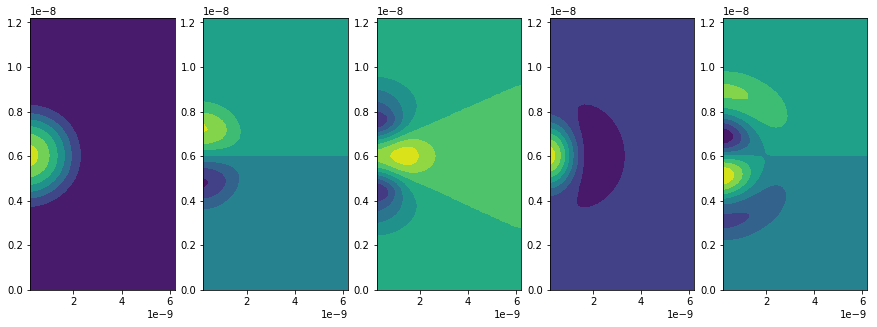

In [40]:
fig, ((ax1, ax2, ax3, ax4, ax5)) = plt.subplots(1,5, figsize = (15,5))
ax1.contourf(r[1:], z, eef[:,0].reshape(m-1,n).T)
ax2.contourf(r[1:], z, eef[:,1].reshape(m-1,n).T)
ax3.contourf(r[1:], z, eef[:,2].reshape(m-1,n).T)
ax4.contourf(r[1:], z, eef[:,3].reshape(m-1,n).T)
ax5.contourf(r[1:], z, eef[:,4].reshape(m-1,n).T)